|||
|---|---|
|Title|nwreadinglist|
|Author|numbworks|
|Version|4.0.0|
||Please check [docs/docs-nwreadinglist.md](../docs/docs-nwreadinglist.md) before proceeding.|

#### Global Modules

In [731]:
from typing import Optional
from nwpackageversions import LanguageChecker, RequirementChecker, RequirementSummary, LambdaCollection

#### Local Modules

In [732]:
from nwreadinglist import DefaultPathProvider, YearProvider, SettingBag, ComponentBag, ReadingListProcessor

#### Language/Requirement Checks

In [733]:
enable_language_status_check : bool = True
enable_requirement_status_check : bool = False

if enable_language_status_check:
    language_status : str = LanguageChecker().get_version_status(required = (3, 12, 5))
    print(language_status)

if enable_requirement_status_check:
    requirement_checker : RequirementChecker = RequirementChecker(logging_function = LambdaCollection().do_nothing_function())
    dockerfile_path : str = requirement_checker.get_default_devcointainer_dockerfile_path()
    requirement_status : Optional[RequirementSummary] = requirement_checker.try_check(file_path = dockerfile_path)
    print(requirement_status)

The installed Python version is matching the expected one (installed: '3.12.5', expected: '3.12.5').


#### Functions : Temp

#### Settings

In [734]:
setting_bag : SettingBag = SettingBag(
    options_rl = ["save"],
    options_rl_asrt = ["display", "log"],
    options_rl_by_kbsize = ["display", "plot"],
    options_rl_by_books_year = ["plot"],
    options_sas = ["display", "save"],
    options_sas_by_publisher = ["display", "log", "save"],
    options_sas_by_rating = ["display", "save"],
    options_sas_by_topic = ["display", "save"],
    options_trend_by_year_topic = ["display", "save"],
    read_years = YearProvider().get_all_years(),
    excel_path = DefaultPathProvider().get_default_reading_list_path(),
    excel_books_nrows = 308
)

#### Main : Analysis

In [735]:
reading_list_processor : ReadingListProcessor = ReadingListProcessor(component_bag = ComponentBag(), setting_bag = setting_bag)
reading_list_processor.initialize()
reading_list_processor.process_rl()

This content (id: 'rl') has been successfully saved as '/home/nwreadinglist/READINGLIST.md'.


In [736]:
reading_list_processor.process_rl_asrt()

Years,Books,Pages,TotalSpend,LastUpdate
9,307,84121,$8750.62,2024-11-10


|   Years |   Books |   Pages | TotalSpend   | LastUpdate   |
|--------:|--------:|--------:|:-------------|:-------------|
|       9 |     307 |   84121 | $8750.62     | 2024-11-10   |



Title,ReadYear,Topic,Publisher,Rating,KBSize,A4Sheets
Machine Learning For Dummies,2017,"Data Analysis, Data Science, ML",Wiley,4,3732,8
Machine Learning Projects for .NET Developers,2017,"Data Analysis, Data Science, ML",Apress,4,3272,7
Producing Open Source Software,2016,Software Engineering,O'Reilly,2,2332,5
Microsoft SQL Server 2012 Integration Services,2019,"BI, Data Warehousing, PowerBI",Wiley,3,2320,5
Infrastructure As Code,2019,Development Tools,O'Reilly,4,2269,5
Microsoft Visual C# 2013 Step by Step,2016,C#,Microsoft Press,4,2179,5
Microservices in .NET Core,2019,C#,Manning,2,2016,5
Head First Design Patterns,2017,Software Engineering,O'Reilly,5,1753,4
Exam Ref 70-768 Developing SQL Data Models,2019,"BI, Data Warehousing, PowerBI",Pearson Education,5,1679,4
Algorithms An illustrated guide for programmers and other curious people,2017,Software Engineering,Manning,5,1650,4


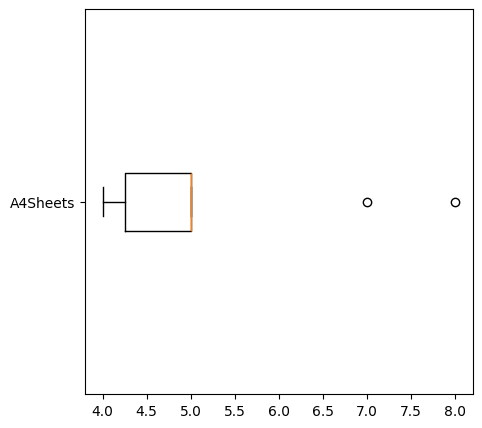

In [737]:
reading_list_processor.process_rl_by_kbsize()

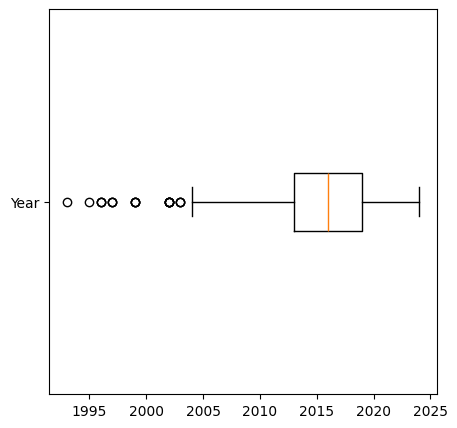

In [738]:
reading_list_processor.process_rl_by_books_year()

In [739]:
reading_list_processor.process_sas()

Month,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
1,0 (0),↑,13 (5157),↓,0 (0),↑,4 (1061),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,3 (855)
2,0 (0),↑,1 (106),↓,0 (0),↑,13 (2991),↓,0 (0),↑,11 (1289),↓,0 (0),=,0 (0),↑,15 (5841)
3,0 (0),↑,16 (3816),↓,6 (600),↑,20 (3349),↓,0 (0),↑,2 (612),↓,0 (0),↑,1 (139),↓,0 (0)
4,0 (0),↑,8 (2539),↓,7 (1986),↓,0 (0),↑,9 (2226),↓,0 (0),=,0 (0),=,0 (0),=,0 (0)
5,1 (288),↑,13 (3527),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,2 (590)
6,8 (1734),↓,4 (788),↓,1 (24),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,8 (642),↓,4 (2572)
7,4 (1758),↓,3 (1140),=,3 (427),↓,2 (444),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,22 (6366)
8,2 (334),↓,1 (453),↓,0 (0),↑,2 (848),↓,0 (0),=,0 (0),=,0 (0),↑,4 (1170),↓,2 (491)
9,4 (881),↓,3 (840),↓,0 (0),↑,1 (1259),↓,0 (0),=,0 (0),↑,1 (360),↑,9 (1969),↓,0 (0)
10,2 (275),↓,0 (0),↑,6 (1201),↓,0 (0),↑,6 (1941),↓,0 (0),=,0 (0),=,0 (0),=,0 (0)


2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
43 (12322),↑,62 (18366),↓,48 (12646),↓,42 (9952),↓,23 (6602),↓,13 (1901),↓,1 (360),↑,25 (4508),↑,50 (17464)
$1447.14,↑,$2093.14,↓,$1249.15,↓,$748.70,↓,$538.75,↓,$169.92,↓,$49.99,↑,$594.80,↑,$1859.03


This content (id: 'sas') has been successfully saved as '/home/nwreadinglist/STUDYINGACTIVITY.md'.


In [740]:
reading_list_processor.process_sas_by_publisher()

,Publisher,Books,A4Sheets,AB%,AvgRating,IsWorth
0,Packt,45,27,60.00,2.16,No
1,O'Reilly,41,33,80.49,2.17,No
2,Syncfusion,38,24,63.16,2.55,Yes
3,Self-Published,34,19,55.88,2.18,No
4,Apress,26,23,88.46,2.19,No
5,Addison-Wesley,19,14,73.68,2.11,No
6,Manning,16,21,131.25,2.56,Yes
7,Wiley,12,23,191.67,2.33,Yes
8,Microsoft Press,9,11,122.22,2.22,Yes
9,Pearson Education,4,5,125.00,3.00,No


'Yes' if 'Books' >= '8' & ('AvgRating' >= '2.5' | 'AB%' >= '100')

This content (id: 'sas_by_publisher') has been successfully saved as '/home/nwreadinglist/STUDYINGACTIVITYBYPUBLISHER.md'.


In [741]:
reading_list_processor.process_sas_by_rating()

Rating,Books
★★★★★,9
★★★★☆,22
★★★☆☆,89
★★☆☆☆,102
★☆☆☆☆,85


This content (id: 'sas_by_rating') has been successfully saved as '/home/nwreadinglist/STUDYINGACTIVITYBYRATING.md'.


In [742]:
reading_list_processor.process_sas_by_topic()

Topic,Books,Pages,A4Sheets
Software Engineering,80,22705,65
C#,56,16449,47
Python,38,11823,16
"Data Analysis, Data Science, ML",34,8631,37
"BI, Data Warehousing, PowerBI",23,6805,21
Development Tools,14,3477,10
Docker,12,1724,7
Product Management,10,3445,4
SQL Server,7,1955,4
"Entrepreneurship, Learning",6,1079,3


Topic,Books,Trend
AI,"[0, 0, 0, 0, 0, 0, 0, 0, 5]",▁▁▁▁▁▁▁▁█
"BI, Data Warehousing, PowerBI","[0, 1, 9, 11, 0, 0, 0, 0, 2]",▁▂▇█▁▁▁▁▂
C#,"[10, 14, 4, 17, 8, 3, 0, 0, 0]",▅▇▃█▄▂▁▁▁
Cloud Vendors,"[0, 0, 0, 0, 0, 2, 0, 1, 0]",▁▁▁▁▁█▁▄▁
"Data Analysis, Data Science, ML","[5, 5, 8, 5, 2, 0, 1, 6, 2]",▅▅█▅▃▁▂▆▃
Development Tools,"[6, 1, 0, 1, 2, 3, 0, 0, 1]",█▂▁▂▃▄▁▁▂
Docker,"[0, 1, 9, 0, 0, 2, 0, 0, 0]",▁▂█▁▁▃▁▁▁
"Electronics, IoT","[0, 4, 0, 0, 0, 0, 0, 0, 0]",▁█▁▁▁▁▁▁▁
"Entrepreneurship, Learning","[0, 1, 0, 0, 4, 0, 0, 1, 0]",▁▃▁▁█▁▁▃▁
Javascript,"[0, 2, 0, 0, 0, 0, 0, 0, 0]",▁█▁▁▁▁▁▁▁


This content (id: 'sas_by_topic') has been successfully saved as '/home/nwreadinglist/STUDYINGACTIVITYBYTOPIC.md'.
